In [1]:
import nibabel
import numpy as np
from pathlib import Path

import sys  
sys.path.insert(0, r"D:\Studia\sem7\inzynierka\aplikacja\ImagingCOVID-19\Methods")

import Grayscale as gray
import CTWindowing as window
import matplotlib.pyplot as plt
%matplotlib inline

from LungSegmentation.LungSegmentation_MethodKMeans_AllTypes import make_lungmask

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

from PixelArrays import get_pixel_array_jpg_png



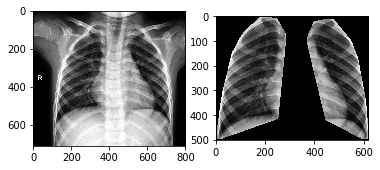

In [2]:
one = r"D:\Studia\sem7\inzynierka\data\xray1.jpeg"
two = r"D:\Studia\sem7\inzynierka\data\xray2.jpg"

arr1 = get_pixel_array_jpg_png(one)
arr1 = gray.convert_rgb_to_grayscale(arr1)
# arr2 = get_pixel_array_jpg_png(two)
lung = make_lungmask(arr1)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(arr1, cmap='gray', vmin=0, vmax=255)
ax2.imshow(lung, cmap='gray', vmin=0, vmax=255)

plt.show()

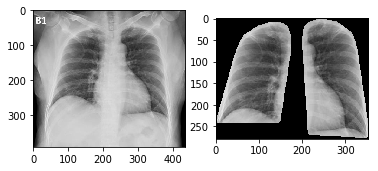

In [3]:
one = r"D:\Studia\sem7\inzynierka\data\xray1.jpeg"
two = r"D:\Studia\sem7\inzynierka\data\xray2.jpg"

arr1 = get_pixel_array_jpg_png(two)
arr1 = gray.convert_rgb_to_grayscale(arr1)
# arr2 = get_pixel_array_jpg_png(two)
lung = make_lungmask(arr1)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(arr1, cmap='gray', vmin=0, vmax=255)
ax2.imshow(lung, cmap='gray', vmin=0, vmax=255)

plt.show()

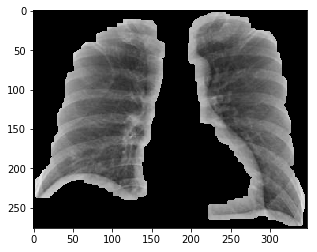

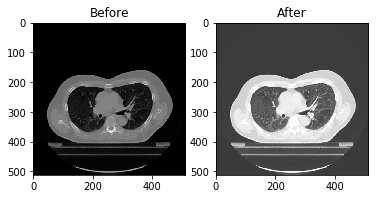

In [6]:
path = r"D:\Studia\sem7\inzynierka\aplikacja\images_data\pacjent2_dcm\1-067.dcm"
hu = window.get_array_dicom_lut("1-067.dcm", r"D:\Studia\sem7\inzynierka\aplikacja\images_data\pacjent2_dcm")
lung_window = window.get_ct_window_grayscale(hu)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(hu, cmap='gray')
ax1.set_title("Before")
ax2.imshow(lung_window, cmap='gray', vmin=0, vmax=255)
ax2.set_title("After")
plt.show()

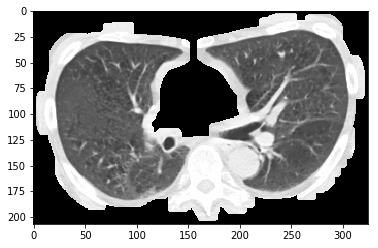

In [3]:
lungs = make_lungmask(lung_window)
plt.imshow(lungs,cmap='gray', vmin=0, vmax=255)

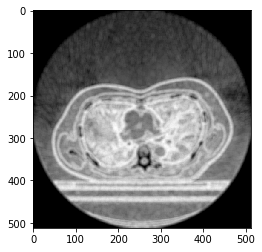

In [23]:
entr_img = entropy(lung_window, disk(5))
plt.imshow(entr_img,cmap='gray')

In [27]:
from PIL import Image

# Creates PIL image
img = Image.fromarray(np.uint8(lung_window) , 'L')
img.show()

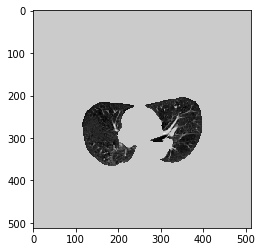

In [7]:
from LungSegmentation.LungSegmentation_MethodB_dicom import SegmentationB
from LungSegmentation.LungSegmentation_MethodA_dicom import SegmentationA

# lungs = SegmentationA.seperate_lungs(hu)
lungs = SegmentationB.get_segmented_lungs(hu)

plt.imshow(lungs, cmap='gray')


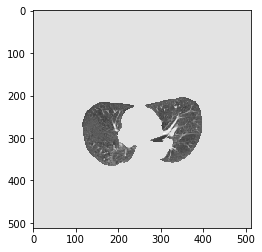

In [9]:
plt.imshow(window.get_ct_window_grayscale(lungs), cmap='gray', vmin=0, vmax=255)

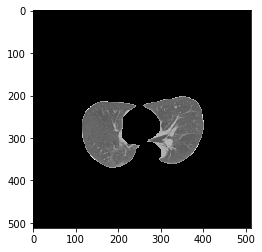

In [44]:
plt.imshow(lungs[0], cmap='gray')